<left>
    <img src="https://kpi.ua/files/images/kpi.png" width="300" alt="kpi logo"  />
</left>

# Курсова робота із методів оптимізації на тему:
##**Партан метод найшвидшого спуску**
Виконав: студент групи КМ-82, Марченко Владислав Володимирович

#####Керівник: доктор фізико-математичних наук Норкін Богдан Володимирович


Зміст


* Вступ
* Постановка задачі
* Матеріали та методи
* Розв'язання задачі
** Імпорт необхідних бібліотек
** Визначення функцій
** Обчислення
* Висновки
* Список використаних джерел

**Вступ**

Проблема багатовимірної оптимізації часто полягає в неможливості аналітичного відображення цільової функції. Для вирішення даної проблеми використовуються чисельні методи. В даній роботі буде описано та програмно реалізоване один з методів багатовимірної оптимізації 1-го порядку, а саме модифікований Партан метод найшвидшого спуску.

**Постановка задачі**

Дослідити збіжність методу найшвидшого спуску та партан-методу найшвидшого спуску при мінімізації степеневої функції  в залежності від:
* Величини кроку h при обчисленні похідних.
* Схеми обчислення похідних.
* Виду методу одновимірного пошуку (ДСК-Пауелла або Золотого перетину).
* Точності методу одновимірного пошуку.
* Значення параметру в алгоритмі Свена.
* Вигляду критерію закінчення. 
* Порівняти з методом найшвидшого спуску.

Використати метод штрафних функцій (метод внутрішньої точки) для умовної оптимізації при розташування локального мінімума поза випуклої допустимої області.


**Матеріали та методи**

“Партан” є скороченням від терміну
*parallel tangents* (паралельні дотичні).
Розглянемо загальний партан-алгоритм для
випадку квадратичної функції двох змінних.

 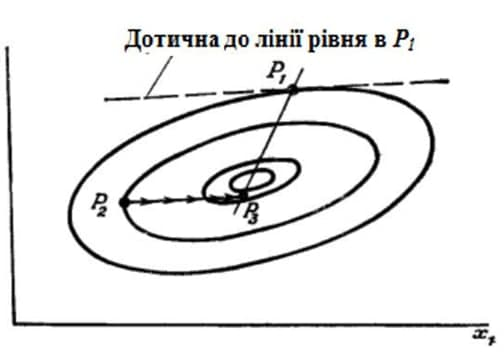

Р1 і Р2 – будь-які дві точки площини.
Спочатку рухаємося з Р2 паралельно
дотичній до лінії рівня в точці Р1 до тих пір,
поки не буде досягнуто мінімум функції f(х) у
деякій точці Р3. Дотичні в Р1 і Р3 паралельні, а мінімум f(х) знаходиться на
лінії, яка проходить через точки Р1 і Р3. Напрями, отримані за допомогою
загального партан – алгоритму, є спряженими. 


#**Розв'язання задачі**

## Імпорт необхідних бібліотек

In [1]:
import math
import numpy as np
import matplotlib.pylab as pl

##Визначення цільової функції та констант

In [16]:
count_func = 0
H_Derivative = 0.000000001
DELTA_MOP = 0.01
LYAMBDA = 0.01
EPSILON = 0.01

def function(x):
    IncrementCountFunc()
    return (10*(x[0] - x[1])**2 + (x[0] - 1)**2)**(4)

##Визначення допоміжних функцій

In [14]:
def IncrementCountFunc():
    global count_func
    count_func = count_func+1

def CountToZero():
    global count_func
    count_func = 0
   

def plot(points, col):
    n = 256
    x = np.linspace(-100, 100, n)
    y = np.linspace(-100, 100, n)
    X, Y = np.meshgrid(x, y)
    
    xs = []
    ys = []
     
    pl.contourf(X, Y, function([X, Y]), 8, alpha=0.75, cmap='jet')
    pl.contour(X, Y, function([X, Y]), 8, colors='black') 
    
    for i in range(len(points)):
        xs.append(points[i][0])
        ys.append(points[i][1])
        
    pl.grid()
    pl.plot(xs, ys, marker='o', linestyle='--', color=str(col), label='Square')

def calcX(x0, grad, lmb):
    #   x0 - gradient*lambda

    return difference(x0, mults(grad, lmb))

def difference(x, y):
    res = []
    for i in range(len(x)):
        res.append(x[i] - y[i])
    return res        

def mults(x, n):
    res = []
    for i in range(len(x)):
        res.append(x[i]*n)
    return res

def gradient(x):
    grad = []
    for i in range(len(x)):
        # grad.append(CentralDerivative(x, i, H_Derivative))
        grad.append(RightDerivative(x, i, H_Derivative))
    return grad 

def LeftDerivative(x, n, h_value):
    h = []
    for i in range(len(x)):
        if i == n:
            h.append(h_value)
        else:
            h.append(0)
    return (function([x[0] + h[0], x[1] + h[1]]) - function([x[0] - h[0], x[1] - h[1]]))/(2*h[n])

def CentralDerivative(x, n, h_value):
    h = []
    for i in range(len(x)):
        if i == n:
            h.append(h_value)
        else:
            h.append(0)
    return (function([x[0] + h[0], x[1] + h[1]]) - function([x[0] - h[0], x[1] - h[1]]))/(2*h[n])

def RightDerivative(x, n, h_value):
    h = []
    for i in range(len(x)):
        if i == n:
            h.append(h_value)
        else:
            h.append(0)
    return (function([x[0] + h[0], x[1] + h[1]]) - function([x[0], x[1]]))/(2*h[n])

def norm(s1):
    normas = 0
    for i in range(len(s1)):
        normas += s1[i]**2
    return math.sqrt(normas)

def calcLambda(x0, grad, eps, lmb, delta):
    
    # return gold(x0, grad, eps, lmb, delta)
    
    return dscPowell(x0, grad, eps, lmb, delta)
    
def gold(x0, grad, eps, lmb, delta):
    
    #      One-dimensional gold search
    
    [a,b] = svenn(x0, grad, lmb, delta)
    l = b - a
    x1 = a + 0.382*l
    x2 = a + 0.618*l
    while l > eps:
        if function(calcX(x0, grad, x1)) < function(calcX(x0, grad, x2)):
            b = x2
            x2 = x1
            l = b - a
            x1 = a + 0.382*l
        else:
            a = x1
            x1 = x2
            l = b - a
            x2 = a + 0.618*l
    # print("gold a: " + str(a))
    # print("gold b: " + str(b)) 
    return (a + b)/2

def svenn(x0, grad, lmb, delta):
    #
    #    One-dimensional Svenn search
    #
    # print ("Svenn stage...")
    f0 = function(calcX(x0, grad, lmb))
    if f0 < function(calcX(x0, grad, lmb+delta)):
        delta = -delta
    x1 = lmb + delta
    f1 = function(calcX(x0, grad, x1))
    while f1 < f0:
        delta *= 2
        lmb = x1
        x1 = lmb + delta
        f0 = f1
        f1 = function(calcX(x0, grad, x1))
    a = lmb + delta/2
    b = lmb - delta/2        
    if a > b:
        temp = b
        b = a
        a = temp     
    #print "svenn a: " + str(a)
    #print "svenn b: " + str(b)    
    return [a , b]

def dsc(x0, grad, lmb, delta):
    svenn_res = svenn(x0, grad, lmb, delta)
    x1 = svenn_res[0]
    x3 = svenn_res[1]
    x2 = (x1 + x3)/2
    f1 = function(calcX(x0, grad, x1))
    f2 = function(calcX(x0, grad, x2))
    f3 = function(calcX(x0, grad, x3))
    xApprox = x2 + ((x3 - x2) * (f1 - f3)) / (2 * (f1 - 2 * f2 + f3))
    return [x1, x2, x3, xApprox]

def dscPowell(x0, grad, eps, lmb, delta):
    dsc_res = dsc(x0, grad, lmb, delta)
    a = dsc_res[0]
    xmin = dsc_res[1]
    b = dsc_res[2]
    xApprox = dsc_res[3]

    while abs(xmin-xApprox) >= eps or abs(function(calcX(x0, grad, xmin)) - function(calcX(x0, grad, xApprox))) >= eps:
        if xApprox < xmin:
            b = xmin
        else:
            a = xmin
        xmin = xApprox
        funcRes =  [function(calcX(x0, grad, a)), function(calcX(x0, grad, xmin)), function(calcX(x0, grad, b))]
        a1 = (funcRes[1] - funcRes[0]) / (xmin - a)
        a2 = ((funcRes[2] - funcRes[0]) / (b - a) - a1) / (b - xmin)
        xApprox = (a + xmin) / 2 - a1 / (2 * a2)
    return 
    
def fastestDescent(x0, eps1, eps2):
    print("fastest descent goes!")
    xs = []
    xs.append(x0)
    x0 = mults(x0, -1)
    x1 = [-x0[0], -x0[1]]
    lmb = 0.1
    while norm(difference(x1, x0))/norm(x0) >= eps1:
        x0 = x1
        grad = gradient(x0)
        if norm(grad) < eps1:
            break
        lmb = calcLambda(x0, grad, eps2, lmb,DELTA_MOP)
        x1 = calcX(x0, grad, lmb)
        print(x1)
        xs.append(x1)
    print("end fastest descent")
    plot(xs, 'red')
    return x1    

def fastestDescent_run():
    CountToZero()
    x0 = fastestDescent([-1.2,0.0],0.01, 0.01)
   
    pl.show()
    print("FUNCTIONS COUNT = " + str(count_func))
    print("MIN FUNCTION = " + str(function(x0)))

def SysKO(x0, grad,lmb,eps):
    if(norm(difference(calcX(x0, grad, lmb),x0))/norm(x0) <= eps and abs(function(calcX(x0, grad, lmb)) - function(x0))<= eps):
        return False
    return True

def NormKO(grad, eps):
    if(norm(grad) <= eps):
        return False
    return True

##Визначення функції нашого методу

In [10]:
def partan(x0, eps1,lmb, color):
    grad = gradient(x0)
    count_dots = 0
    while NormKO(grad, eps1):
    # while(SysKO(x0, grad, lmb, eps1)):
        xs = []
        xs.append(x0)
        print ("x0 = " + str(x0))
        lmb = calcLambda(x0, grad, eps1, lmb, DELTA_MOP)
        x1 = calcX(x0, grad, lmb)
        print ("x1 = " + str(x1))
        count_dots = count_dots + 1
        grad = gradient(x1)
        lmb = calcLambda(x1, grad, eps1, lmb, DELTA_MOP)
        x2 = calcX(x1, grad, lmb)
        print ("x2 = " + str(x2))
        count_dots = count_dots + 1
        grad = difference(x2, x0)
        lmb = calcLambda(x2, grad, eps1, lmb, DELTA_MOP)
        x0 = calcX(x2, grad, lmb)
        print ("x3 = " + str(x0))
        count_dots = count_dots + 1
        grad = gradient(x0)
       
        print("-------------------------")
        xs.append(x0) 
        num = (count_func+count_dots)%len(color)
        plot(xs, color[num])    
    return count_dots, x0

def partan_run():
    CountToZero()
    count_dots, x0 = partan([-1.2,0.0],eps1=0.01, lmb =0.01, color = ['orange', 'red', 'yellow', 'white'])
   
    pl.show()
    print("FUNCTIONS COUNT = " + str(count_func))
    print("STEPS COUNT = " + str(count_dots))
    print("MIN FUNCTION = " + str(function(x0)))

#Обчислення

##Згідно завдання потрібно порівняти результат виконання в залежності від параметрів:

### 1. Величини кроку h при обчисленні похідних.

PARTAN RESULT
* x0 = [-1.2, 0.0]
* x1 = [-0.5032568480112748, -0.5888270334151685]
* x2 = [0.3844795469851663, 0.5837653302365208]
* x3 = [0.7499521419730438, 0.7184153675383238]
-------------------------
* FUNCTIONS COUNT = 145
* STEPS COUNT = 3
* MIN FUNCTION = 2.758187346695868e-05

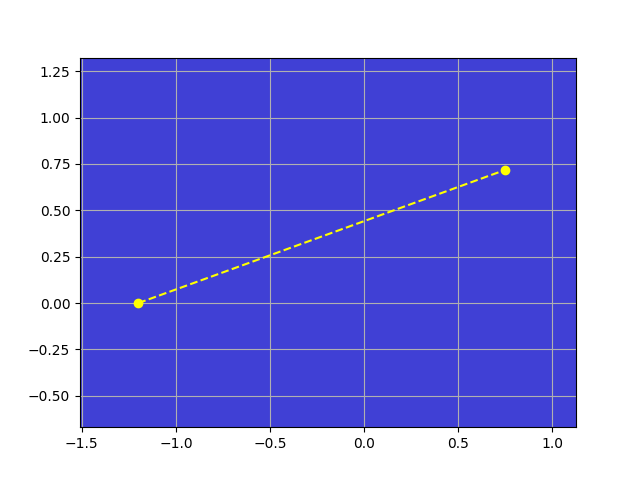

MNS RESULT
* fastest descent goes!
* [-0.5054144038961859, -0.5870036538419161]
* [0.80575248278199, 0.9643587389823047]
* [0.8931092077200526, 0.8865317147264167]
* end fastest descent
* FUNCTIONS COUNT = 75
*MIN FUNCTION = 1.9773618947870773e-08

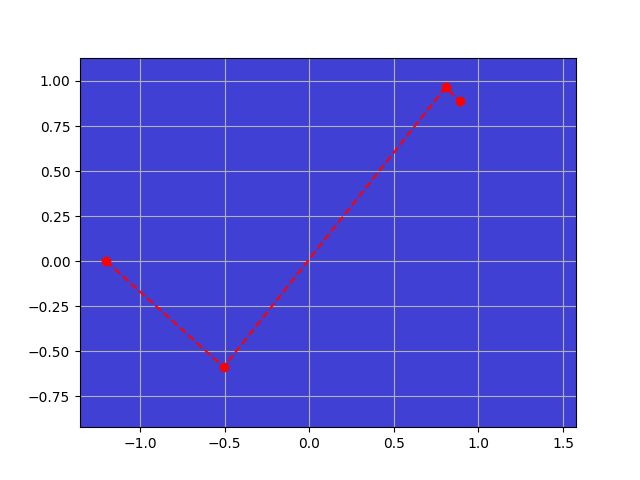

Як можна побачити, наші результати далекі від ідеальних. Тому спробуймо змінити значення параметру h = 0.000000000001 збільшивши його у 10 разів

PARTAN RESULT
* x0 = [-1.2, 0.0]
* x1 = [-0.5032395866988046, -0.588810169555527]
* x2 = [0.38293192646174845, 0.5822348362612271]
* x3 = [0.7483112443483589, 0.7166288451043422]
-------------------------
* FUNCTIONS COUNT = 145
* STEPS COUNT = 3
* MIN FUNCTION = 2.90020420155485e-05

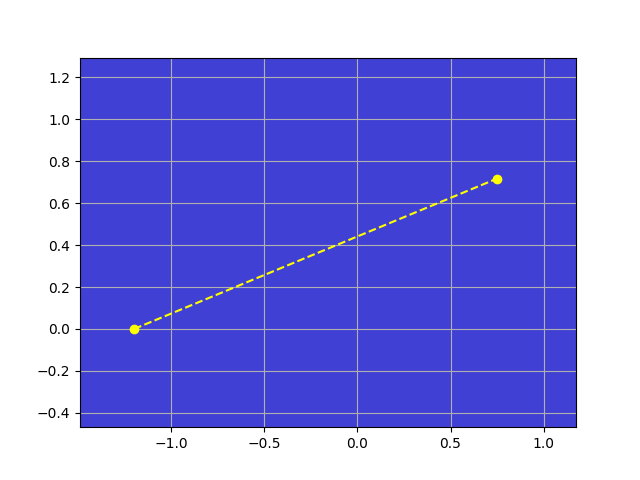

MNS RESULT
* fastest descent goes!
* [-0.5053968447248615, -0.5869871390850109]
* [0.8052992852754951, 0.9640099313196729]
* [0.8927533548923898, 0.8861123135881958]
* end fastest descent
* FUNCTIONS COUNT = 75
* MIN FUNCTION = 2.0343977397877904e-08

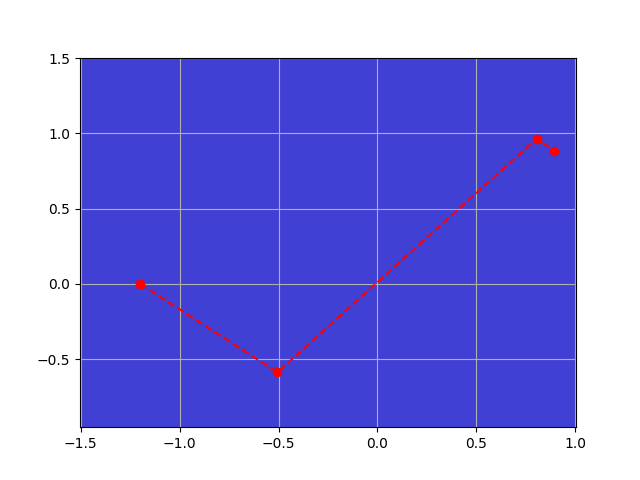

Як можна побачити зміна параметра h у 10 разів не змінила результатів обчислень. Спробуємо зменшити ще у 100 разів.

PARTAN RESULT
* x0 = [-1.2, 0.0]
* x1 = [-0.5032404064702234, -0.5888109145785281]
* x2 = [0.3828921692261035, 0.582196036942108]
* x3 = [0.7482692065677783, 0.7165836264858567]
-------------------------
* FUNCTIONS COUNT = 145
* STEPS COUNT = 3
* MIN FUNCTION = 2.903869997208892e-05

Результат не змінився, що означає що значення параметра h не впливає на кількість обчислень.

### 2. Схеми обчислення похідних.

Ми спостерігали результати обчисленнь із правою різнецевою схемою обчисленью Перевіримо результат із лівою.

PARTAN RESULT
* x0 = [-1.2, 0.0]
* x1 = [-0.5069709125499678, -0.5856583742804787]
* x2 = [0.47157939083106815, 0.4836379562058043]
* x3 = [0.5771152338667228, 0.5141726347931278]
-------------------------
* x0 = [0.5771152338667228, 0.5141726347931278]
* x1 = [0.564145257487042, 0.5536981115977138]
* x2 = [0.6282480766700135, 0.573907081351074]
* x3 = [0.9896648823541607, 0.9961216831743461]
-------------------------
* FUNCTIONS COUNT = 218
* STEPS COUNT = 6
* MIN FUNCTION = 7.52294862108877e-14

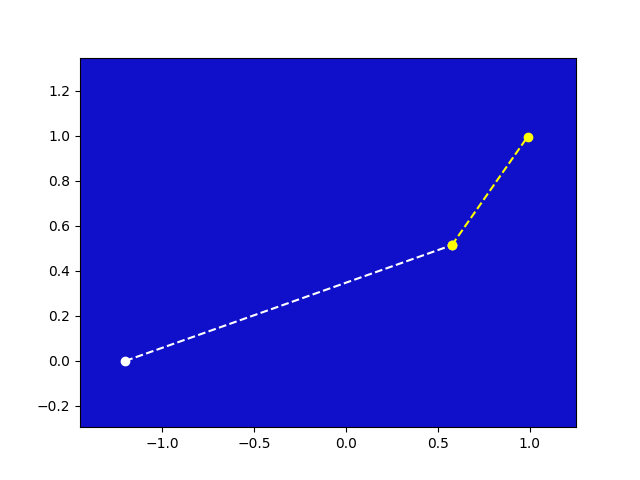

MNS RESULT
* fastest descent goes!
* [-0.5053976442198096, -0.5869878967914858]
* [0.8064390239518477, 0.9653524411918922]
* [0.8917084256471022, 0.8893413962514125]
* end fastest descent
* FUNCTIONS COUNT = 80
* MIN FUNCTION = 1.927690355059319e-08

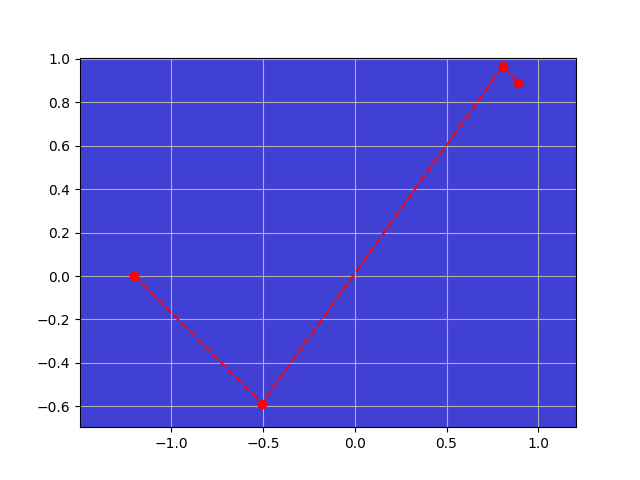

Як можемо побачити, після зміни схеми обчислення похідних результат для Партан методу покращився. Результат МНС не змінився. Спробуємо застосувати Центральну різницеву схему.

PARTAN RESULT
* x0 = [-1.2, 0.0]
* x1 = [-0.5069709125499678, -0.5856583742804787]
* x2 = [0.47157939083106815, 0.4836379562058043]
* x3 = [0.5771152338667228, 0.5141726347931278]
-------------------------
* x0 = [0.5771152338667228, 0.5141726347931278]
* x1 = [0.564145257487042, 0.5536981115977138]
* x2 = [0.6282480766700135, 0.573907081351074]
* x3 = [0.9896648823541607, 0.9961216831743461]
-------------------------
* FUNCTIONS COUNT = 218
* STEPS COUNT = 6
* MIN FUNCTION = 7.52294862108877e-14

MNS RESULT
* fastest descent goes!
* [-0.5053976442198096, -0.5869878967914858]
* [0.8064390239518477, 0.9653524411918922]
* [0.8917084256471022, 0.8893413962514125]
* end fastest descent
* FUNCTIONS COUNT = 80
* MIN FUNCTION = 1.927690355059319e-08

Оскільки результат не змінився, можемо підвести підсумки, що обідва методи досить непогано працюють використовуючи Ліву та Центральну різнецеву схему обчислення похідних.

### 3. Виду методу одновимірного пошуку





Попередні результати були отримані при використанні алгоритму ДСК-Пауелла. Спробуємо покращити результат використавши алгоритм Золотого перерізу.

PARTAN RESULT
* x0 = [-1.2, 0.0]
* x1 = [1179.4475425953974, -997.7304582542272]
* x2 = [-3.1142272303056827e+25, 2.952395849569671e+25]
* x3 = [5.509784713329246e+22, -5.223467755131927e+22]
-------------------------
* FUNCTIONS COUNT = 57
* STEPS COUNT = 3
* MIN FUNCTION = 1.9544986352890873e+188

MNS RESULT
* fastest descent goes!
* [663.0628463023845, -561.3489632863774]
* [-3.1146961932350656e+23, 2.9550978026241336e+23]
* end fastest descent
* FUNCTIONS COUNT = 33
* MIN FUNCTION = 2.044292597494666e+194

Як можемо побачити, при данних параметрах за використання алгоритму Золотого перерізу, результат обох методів сильно погіршився. Перевіримо в наступних пунктах, чи можна його покращити.

### 4. Точності методу одновимірного пошуку

В цьому пункті спробуємо змінюючи точність алгоритму Золотого перерізу покращити результат обчислень.

PARTAN RESULT
* x0 = [-1.2, 0.0]
* x1 = [-0.8542592292185684, -0.29217534041583343]
* x2 = [-0.41348499010683765, -0.623611959167061]
* x3 = [-0.48449742747419167, -0.5673076234139528]
-------------------------
* x0 = [-0.48449742747419167, -0.5673076234139528]
* x1 = [0.526052989737308, 0.7075919284760183]
* x2 = [0.6384913943610655, 0.6184309405048188]
* x3 = [0.9999317240264545, 1.0000676310102188]
-------------------------
* FUNCTIONS COUNT = 213
* STEPS COUNT = 6
* MIN FUNCTION = 1.2859755392710229e-27

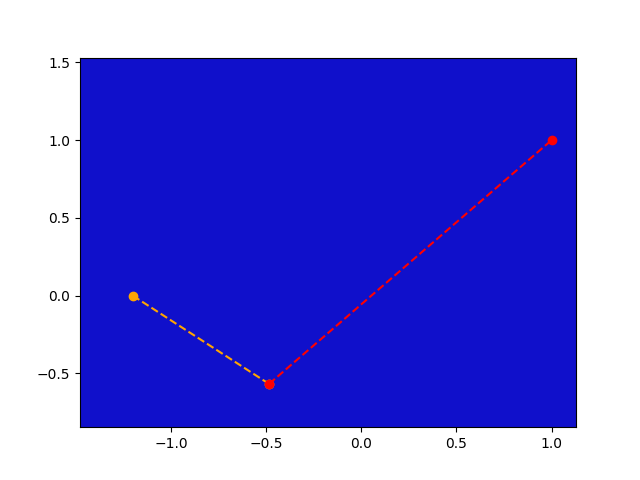

MNS RESULT
* fastest descent goes!
* [663.0628463023845, -561.3489632863774]
* [-3.1146961932350656e+23, 2.9550978026241336e+23]
* end fastest descent
* FUNCTIONS COUNT = 33
* MIN FUNCTION = 2.044292597494666e+194

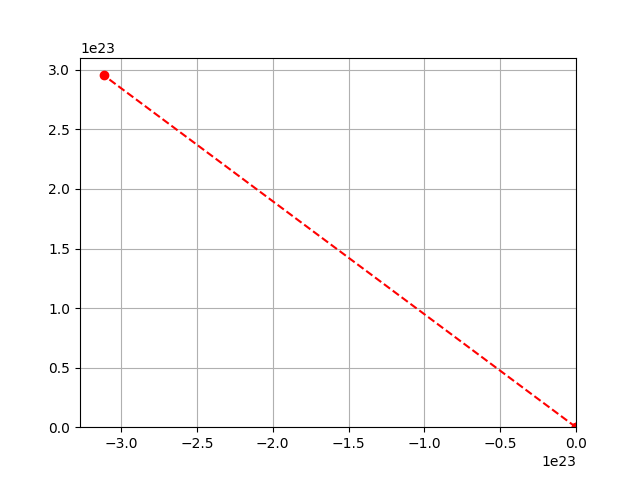

Як можемо побачити, алгоритм працює. Результат Партан методу покращився у рази. Результат МНС не змінився. 
З чого можемо зробити висновок, що для невеликої точності до 10^(-3) краще використовувати ДСК-Пауєлла для степеневих функцій. Проте для більш високої точності він не підходить адже має в собі делення на сумму значень функцій в достатньо маленьких за занченням точках - що може викликати помилку ділення на нуль. 
В той же час метод Золотого переізу повертає достатньо велику довжину кроку, при невеликій точності, і краще працює для більш високої точності

### 5.	Значення параметру в алгоритмі Свена.

Попередні результати були при значенні параметра 0.01. Спробуємо покращити попередній результат.

PARTAN RESULT
* x0 = [-1.2, 0.0]
* x1 = [-3.7080803031787815, 2.1195047801717433]
* x2 = [-73960.46003615698, 68430.59709030573]
* x3 = [-0.8673344077833463, -0.3077979024674278]
-------------------------
* x0 = [-0.8673344077833463, -0.3077979024674278]
* x1 = [-0.9209714441520161, -0.2675820360382837]
* x2 = [-1.0266947437700855, -0.18587942043640265]
* x3 = [-0.5021116283864633, -0.5872112620811095]
-------------------------
* x0 = [-0.5021116283864633, -0.5872112620811095]
* x1 = [0.4044584976855461, 0.5976584725464694]
* x2 = [0.5291025897959692, 0.5023831371438785]
* x3 = [1.0000288251774705, 0.9999699425548725]
-------------------------
* FUNCTIONS COUNT = 376
* STEPS COUNT = 9
* MIN FUNCTION = 1.5886816684160562e-30

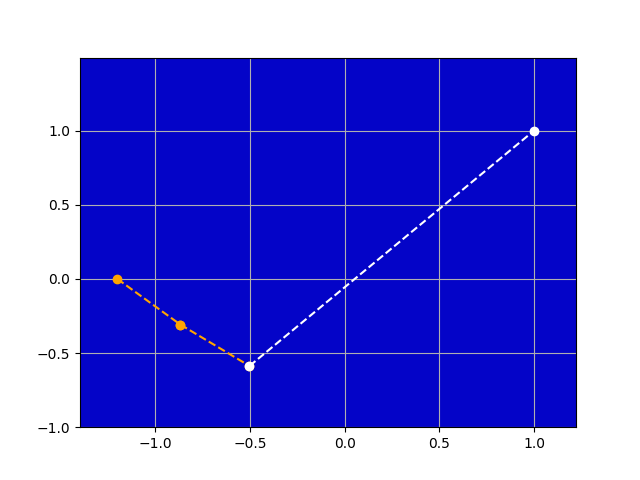

MNS RESULT
* fastest descent goes!
* [-435.492856241783, 367.008099235204]
* [3.220850241965724e+21, -3.0552872776576716e+21]
* end fastest descent
* FUNCTIONS COUNT = 43
* MIN FUNCTION = 2.6711514375741943e+178

Як можемо побачити, партан метод зміг покращити свій результат при значення дельта=0.0001
За цього ж значення МНС продовжує давати неправильний результат.

### 6.	Вигляду критерію закінчення.

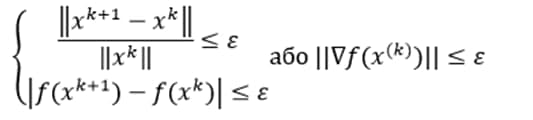

Попередні результати були отримані при використанні критерію порівняння норми градієнта. Проте при використанні в якості метода одновимірного пошуку Золотий переріз - збільшилась кількість ітерацій - а отже й збільшилася кількість викликів цільової функції. Спробуємо покращити ці результати.


PARTAN RESULT
* x0 = [-1.2, 0.0]
* x1 = [-0.5054466704764233, -0.5869465583472928]
* x2 = [0.742518101074457, 0.8861370498383445]
* x3 = [1.0050345659393747, 1.0058916948945313]
-------------------------
* FUNCTIONS COUNT = 154
* STEPS COUNT = 3
* MIN FUNCTION = 1.1424799045347894e-18

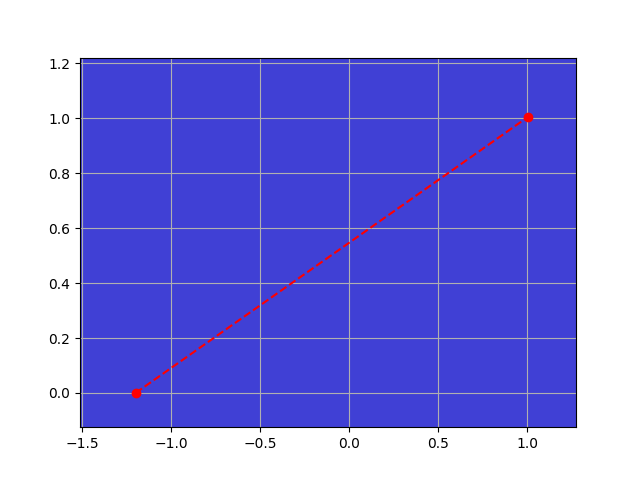

MNS RESULT
* fastest descent goes!
* [-0.50555071939656, -0.5868586296700006]
* [0.621269485264395, 0.7362222766223817]
* [0.6969722716499063, 0.679280035184479]
* [0.8396335033654843, 0.8794298049213811]
* [0.8673903986524236, 0.8596453988847522]
* end fastest descent
* FUNCTIONS COUNT = 252
* MIN FUNCTION = 1.0936243706760676e-07

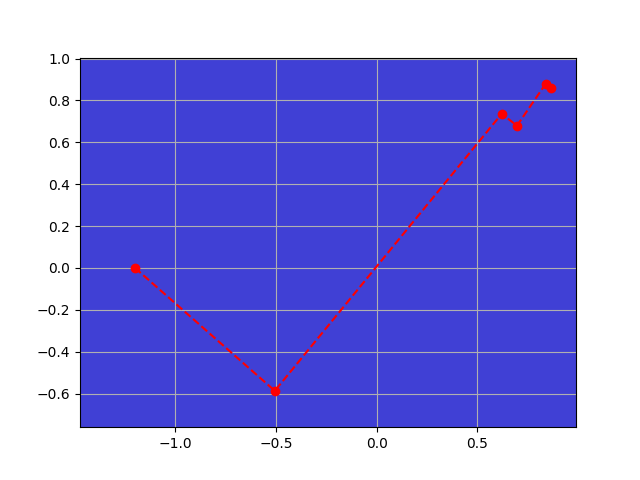

Як можемо побачити при використанні алгоритму ДСК-Пауєлла та системи в якості критерія закінчення - результат покращився для обох методів. Для Партан зменшилась кількість ітерацій, для МНС результат став наближатися до істинного.

PARTAN RESULT
* x0 = [-1.2, 0.0]
* x1 = [-3.7080803031787815, 2.1195047801717433]
* x2 = [-73960.46003615698, 68430.59709030573]
* x3 = [-0.8673344077833463, -0.3077979024674278]
-------------------------
* x0 = [-0.8673344077833463, -0.3077979024674278]
* x1 = [-0.9209714441520161, -0.2675820360382837]
* x2 = [-1.0266947437700855, -0.18587942043640265]
* x3 = [-0.5021116283864633, -0.5872112620811095]
-------------------------
* x0 = [-0.5021116283864633, -0.5872112620811095]
* x1 = [0.4044584976855461, 0.5976584725464694]
* x2 = [0.5291025897959692, 0.5023831371438785]
* x3 = [1.0000288251774705, 0.9999699425548725]
-------------------------
* FUNCTIONS COUNT = 378
* STEPS COUNT = 9
* MIN FUNCTION = 1.5886816684160562e-30

Якщо ж продовжувати використовувати для пошуку довжини кроку метод Золотого перерізу, то значення функціїї в кінцевій точці ми отримаємо найменшим. Але є досить великою кількість викликів цільової функціїї, що не є добре.

### 7. Порівняти з методом найшвидшого спуску.


Оскільки в усіх попередніх завданнях ми паралельно проводили обчислення обома методами - цей пункт вже є розглянутим.

##Умовна оптимізація

В якості допустимої області будемо розглядати коло, яке не містить точку мінімума, а штраф задамо зворотною функцією. Бо за логарифмічного штрафу -  ми повєязуємось до бібліотек, які можуть цей логарифм обрахувати. А в нашому випадку такої залежності немає - що є більш надійним.

In [17]:
def Rpartan(x0, eps1,lmb, color):
    STOP = False 
    STOP_R = False 
    grad = gradient(x0)
    count_dots = 0
    while not STOP_R:
        STOP = False
        while not STOP:
            xs = []
            xs.append(x0)
            print ("x0 = " + str(x0))
            lmb = calcLambda(x0, grad, eps1, lmb, DELTA_MOP)
            x1 = calcX(x0, grad, lmb)
            print ("x1 = " + str(x1))
            count_dots = count_dots + 1
            grad = gradient(x1)
            lmb = calcLambda(x1, grad, eps1, lmb, DELTA_MOP)
            x2 = calcX(x1, grad, lmb)
            print ("x2 = " + str(x2))
            count_dots = count_dots + 1
            grad = difference(x2, x0)
            lmb = calcLambda(x2, grad, eps1, lmb, DELTA_MOP)
            x0 = calcX(x2, grad, lmb)
            print ("x3 = " + str(x0))
            count_dots = count_dots + 1
            grad = gradient(x0)
            
            print("-------------------------")
            xs.append(x0) 
            num = (count_func+count_dots)%len(color)
            plot(xs, color[num])
            if not NormKO(grad, eps1):
                STOP = True
        if not NormKO(grad, eps1):
            STOP_R = True
        else:
            global R_func
            R_func = (R_func / 10)
            print(f'R: {R_func}')
    return count_dots, x0


def NormKO(grad, eps):
    if(norm(grad) <= eps):
        return False
    return True

def partan_run():
    CountToZero()
    count_dots, x0 = Rpartan([-1.2,0.0],eps1=0.01, lmb =0.01, color = ['orange', 'red', 'yellow', 'purple'])
    
    circle = pl.Circle((-1, 0), 1, fill = False, color = 'b')
    pl.gca().add_patch(circle)
    pl.grid()
    pl.show()
    print("FUNCTIONS COUNT = " + str(count_func))
    print("STEPS COUNT = " + str(count_dots))
    print("MIN FUNCTION = " + str(function(x0)))

* x0 = [-1.2, 0.0]
* x1 = [-0.5054148294484124, -0.5870032942019908]
* x2 = [0.8668757522060377, 1.0371451256071214]
* x3 = [0.7642353624462941, 0.9856408299008541]
-------------------------
* x0 = [0.7642353624462941, 0.9856408299008541]
* x1 = [0.7689139006069379, 0.9722152697300493]
* x2 = [0.7382847527996201, 0.9602851320481935]
* x3 = [-0.07916854597404677, 0.1615717632845306]
-------------------------
* x0 = [-0.07916854597404677, 0.1615717632845306]
* x1 = [-0.056691408526204676, 0.13858924742551768]
* x2 = [0.639306582230808, 0.9257974364794566]
* x3 = [0.5027518969943401, 0.7805473197308003]
-------------------------
* x0 = [0.5027518969943401, 0.7805473197308003]
* x1 = [0.6089836568946003, 0.6783331701840342]
* x2 = [0.5308059804377248, 0.7108038204670178]
* x3 = [0.5298613904579937, 0.7131521064371832]
-------------------------
* x0 = [0.5298613904579937, 0.7131521064371832]
* x1 = [0.4904880320001252, 0.6981025767860517]
* x2 = [0.5006869428566106, 0.6752202693544107]
* x3 = [-0.14962969001015136, -0.1703040369549822]
-------------------------
* x0 = [-0.14962969001015136, -0.1703040369549822]
* x1 = [-0.15156042548440446, -0.1696077061282024]
* x2 = [-0.15003540342575447, -0.1701313929483426]
* x3 = [-0.15069063921569037, -0.16985256920794436]
-------------------------
* FUNCTIONS COUNT = 1835
* STEPS COUNT = 18
* MIN FUNCTION = 6.359771688958397

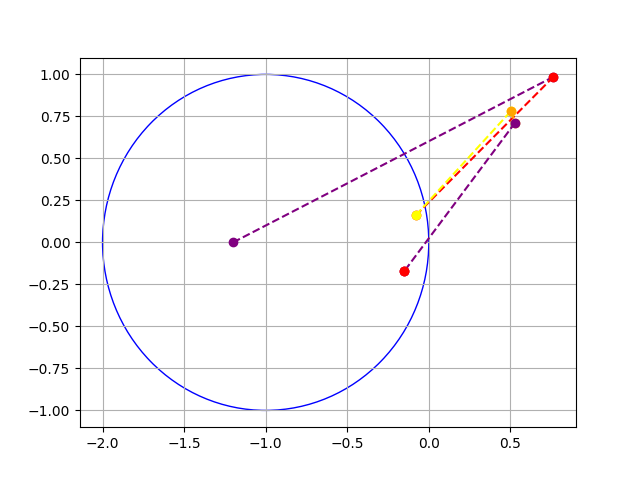

Як можемо побачити, з першого кроку нас виводить з області, і на кожній ітераціїї метод намається повернутися в неї. При цьому знайти положення в якому виконаються умови критерію закінчення. Спробуймо зменшити значення значення параметрів і порівняти результат.

* FUNCTIONS COUNT = 605
* STEPS COUNT = 18
* MIN FUNCTION = 6.359771624569219 

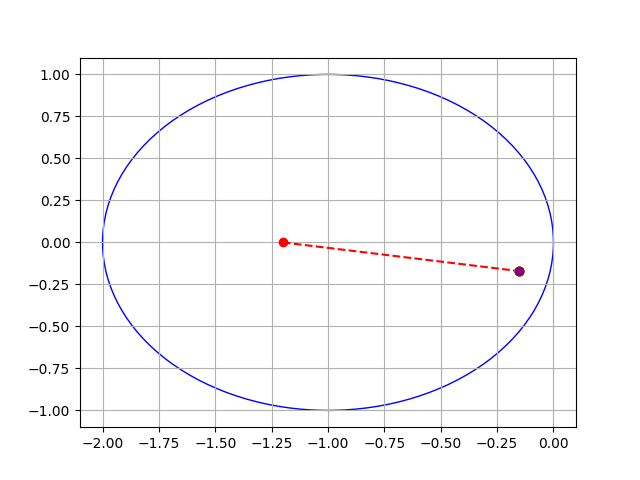

Було змінено значення параметра одновимірного пошуку і критерія закінчення. Як результат - майже в два рази зменшилась кількість викликів функцій. А якщо ще й зменшити початкову довжину кроку - отримаємо наступний результат

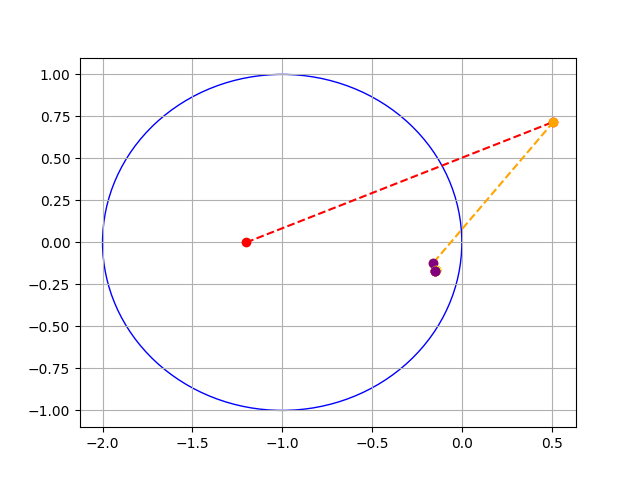

# **Висновки**

В даній курсовій роботі було описано та реалізовано Партан метой найшвидшого спуску. Метод є достатньо простим і ефективним для чисельного вирішення проблеми багатовимірної оптимізації. Для тестів методу було використано умовну та безумовну оптимізацію степеневої функції, кожну з яких метод пройшов успішно, а результати кожного випробування задокументовані.

# **Посилання**

* Химмельблау: "Прикладное нелинейное программирование"
* Реклейтис: "Оптимизация в технике"